<h1>РК №1 ТМО<h1>
<h4>Казакова В.В. ИУ5Ц-81Б<h4>
<h4>Вариант №27<h4>
<h4>Тема: Технологии разведочного анализа и обработки данных<h4>
<h4>Задача №4<h4>
<h4>Датасет: https://www.kaggle.com/carlolepelaars/toy-dataset<h4>

<h5>Подготовим данные к анализу<h5>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
data = pd.read_csv('toy_dataset.csv')

# Удаление строк с пропусками
data = data.dropna()

<h5>Гистограмма возраста<h5>

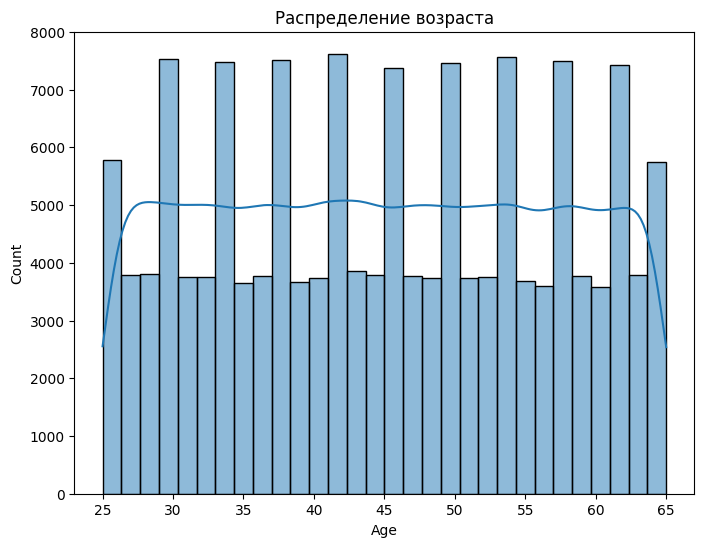

In [2]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'], bins=30, kde=True)
plt.title('Распределение возраста')
plt.show()

<h6>По диаграмме распределения возраста можем заметить, что большинство респондентов находятся в возрастной группе от 30-ти до 60-ти лет.<h6>

<h5>Гистограмма дохода<h5>

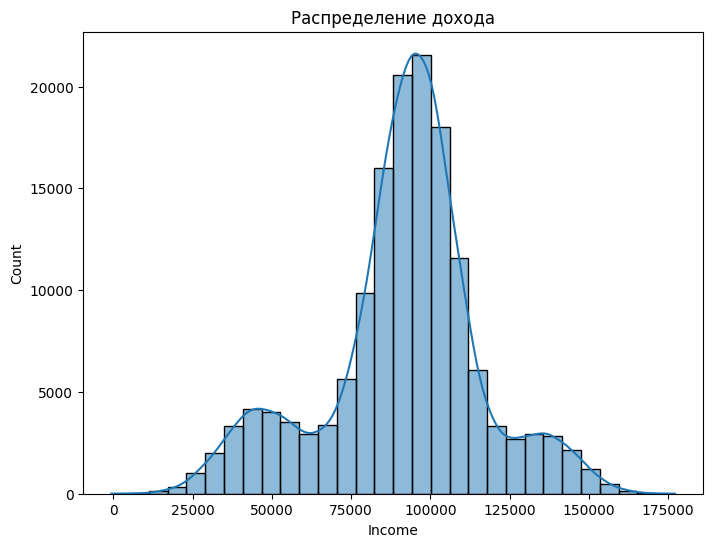

In [3]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Income'], bins=30, kde=True)
plt.title('Распределение дохода')
plt.show()

<h5>Круговая диаграмма по полу<h5>

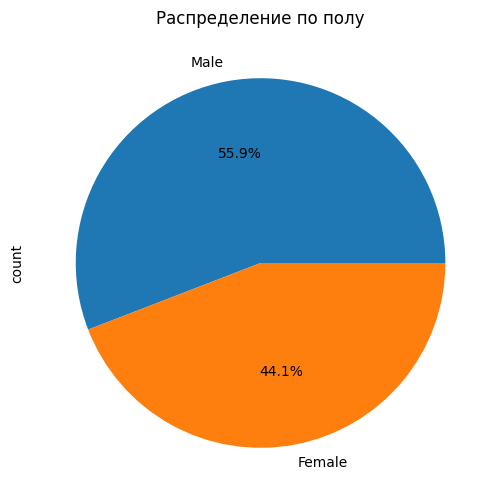

In [4]:
plt.figure(figsize=(6, 6))
data['Gender'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Распределение по полу')
plt.show()

<h6>Отметим, что есть равномерное распределение между мужчинами и женщинами.<h6>

<h5>Столбчатая диаграмма болезни<h5>

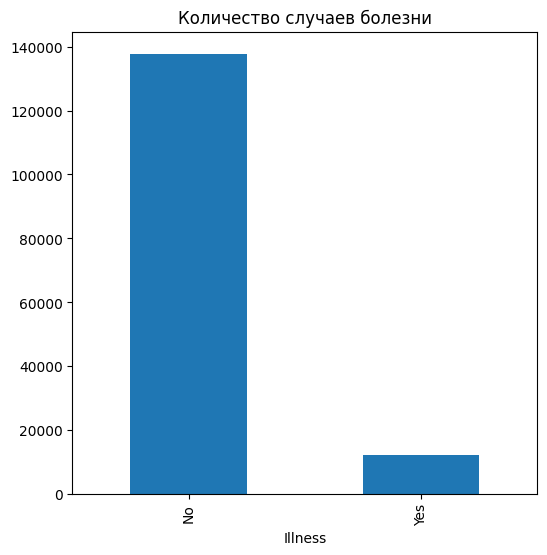

In [5]:
plt.figure(figsize=(6, 6))
data['Illness'].value_counts().plot.bar()
plt.title('Количество случаев болезни')
plt.show()

<h5>Boxplot дохода по полу<h5>

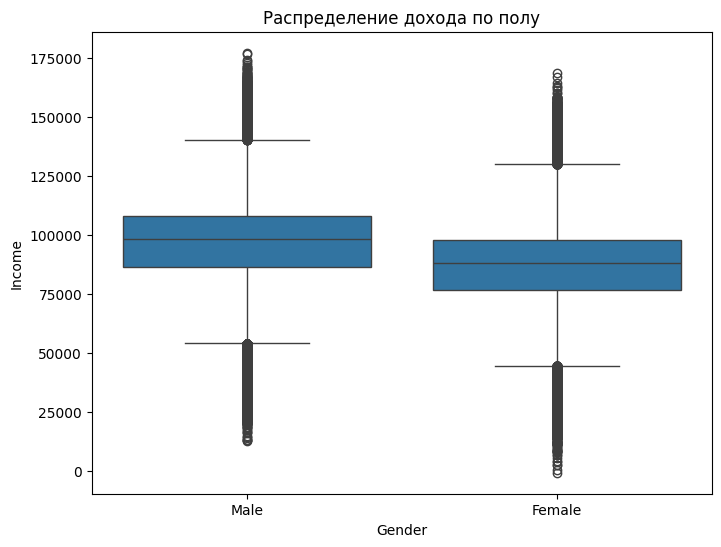

In [6]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Income', data=data)
plt.title('Распределение дохода по полу')
plt.show()

<h6>Доход растет до 50 лет, затем стабилизируется или снижается, что свидетельствует от слабой положительной корреляции.<h6>

<h5>Boxplot возраста по болезни<h5>

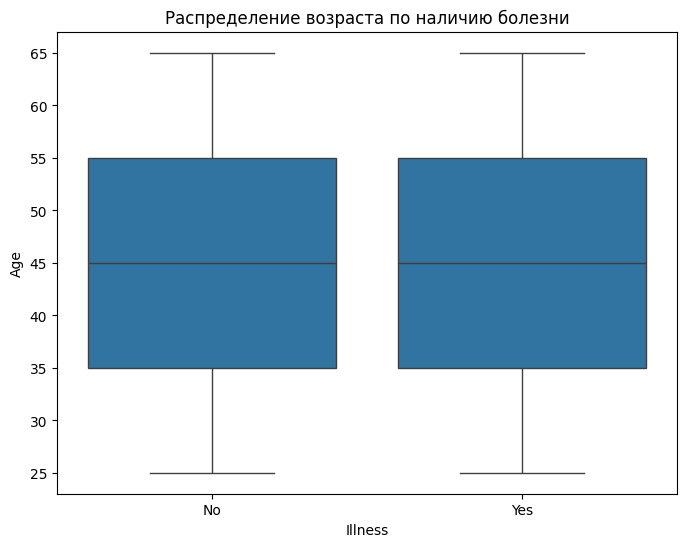

In [7]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Illness', y='Age', data=data)
plt.title('Распределение возраста по наличию болезни')
plt.show()

<h5>Точечный график (диагамма рассеивания) дохода от возраста<h5>

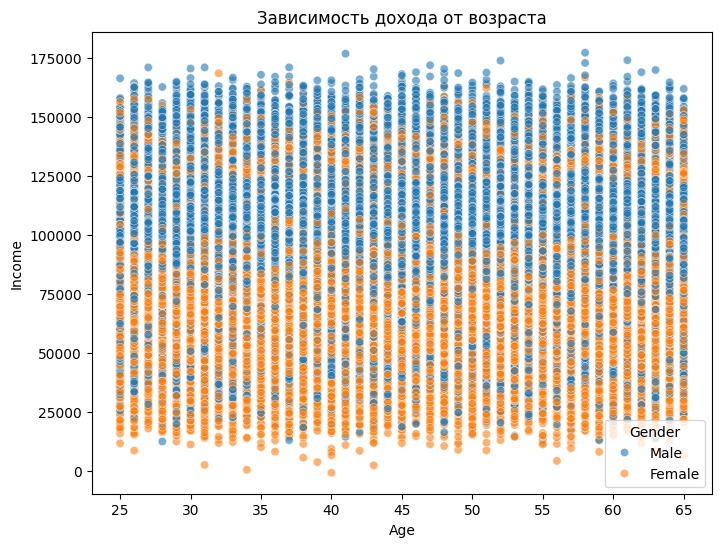

In [14]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Income', data=data, hue='Gender', alpha=0.6)
plt.title('Зависимость дохода от возраста')
plt.show()

<h6>Этот график подтверждает, что возраст влияет на доход, но зависимость нелинейна и требует более глубого анализа и разбивания по профессии или образованию.<h6>

<h6>К примеру, можем увеличить участок диаграммы для получения более детальной информации.<h6>

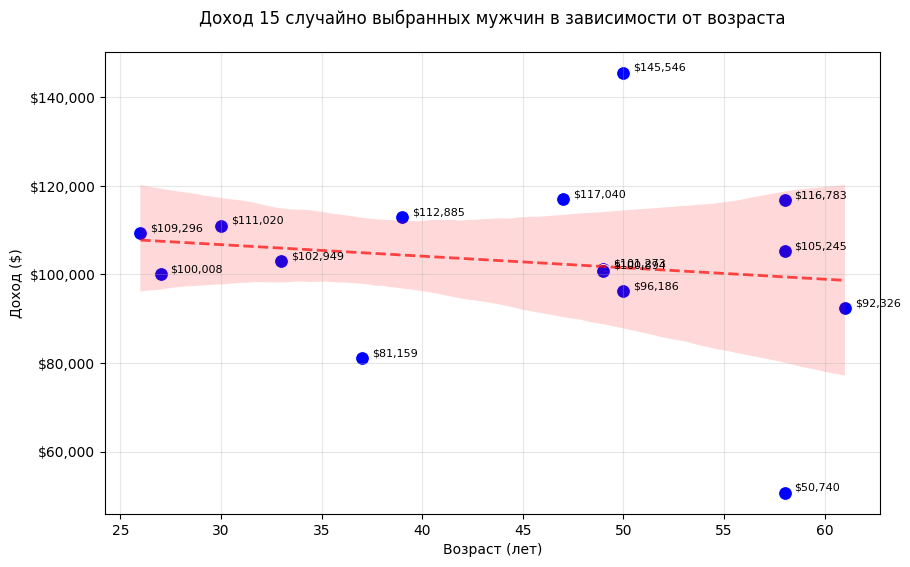

In [16]:
male_data = data[data['Gender'] == 'Male'].sample(15, random_state=42)  # random_state для воспроизводимости

plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(x='Age', y='Income', data=male_data, s=100, color='blue')

for i in range(len(male_data)):
    plt.text(x=male_data['Age'].iloc[i]+0.5, 
             y=male_data['Income'].iloc[i]+500, 
             s=f"${male_data['Income'].iloc[i]:,.0f}",
             fontsize=8)
    
sns.regplot( x='Age', y='Income', data=male_data, scatter=False, color='red',line_kws={'linestyle':'--', 'linewidth':2, 'alpha':0.7})

plt.title('Доход 15 случайно выбранных мужчин в зависимости от возраста', pad=20)
plt.xlabel('Возраст (лет)')
plt.ylabel('Доход ($)')
plt.grid(True, alpha=0.3)

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x:,.0f}'))

plt.show()

<h6>После случайного выбора 15-ти мужчин можем сказать, что средний доход с возрастом падает, что говорит нам о возможном выходе на пенсию ближе к 60-ти годам. Это является отрицательной корреляцией.<h6>